failed to read:utf-8
file successfully read with encoding:latin1
csv file has been successfully loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


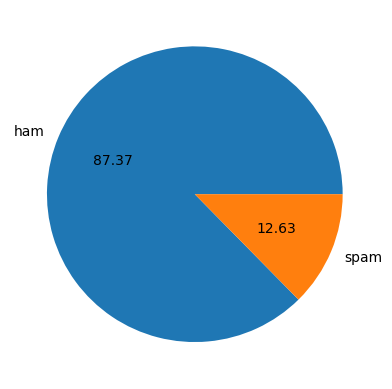

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.

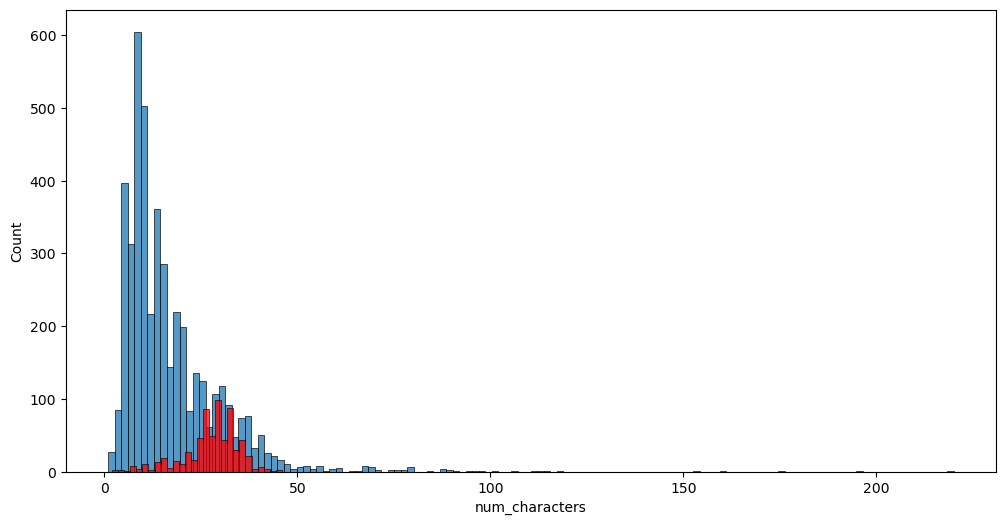

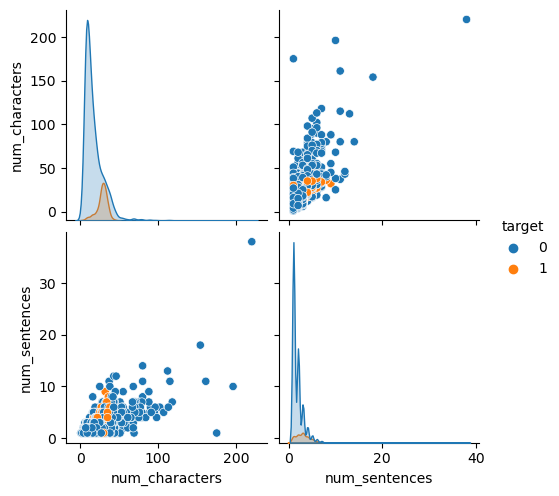

In [3]:
import numpy as np 
import pandas as pd
encodings =['utf-8','latin1','ISO-88591','cp1252']
file_path =(r"C:\Users\user\Downloads\spam.csv")
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"file successfully read with encoding:{encoding}")
        break
    except UnicodeDecodeError:
        print(f"failed to read:{encoding}")
        continue
if 'df' in locals():
    print("csv file has been successfully loaded")
else:
    print("all encoding attempts failed")
df.sample(5)
df.shape
df.info()
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()
df.isnull().sum()
df.duplicated().sum
df=df.drop_duplicates(keep='first')
df.duplicated().sum()
df.shape
df.head()
df['target'].value_counts()
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()
import nltk
get_ipython().system('pip install nltk')
nltk.download('punkt')
df['num_characters']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()
df[['num_characters','num_sentences']].describe()
df[df['target']==0][['num_characters','num_sentences']].describe()
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')
sns.pairplot(df,hue="target")